<a href="https://colab.research.google.com/github/fedor44/Reinforcement_Learning_Test/blob/main/Reinforcement_Learning_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 15.9 MB/s eta 0:00:00


In [3]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [15]:
env = gym.make("FrozenLake-v1", desc = None,
               render_mode = "human",
               map_name="4x4", is_slippery = False)

#print(env.observation_space.n)
#print(env.action_space.n)
num_states = env.observation_space.n
num_actions = env.action_space.n
transitions = env.unwrapped.P

obj, _ = env.reset()

for i in range(10):
  action = env.action_space.sample()
  obs, reward, terminated, truncated, info = env.step(action)

  if terminated or truncated:
    obs, _ = env.reset()
    time.sleep(0.5)

env.close()

In [17]:
import pandas as pd

## take a lesson
V = np.zeros(num_states)
pi = np.ones([num_states, num_actions]) * 0.25

gamma = 0.95
theta = 1e-3
count = 0

while True:
  delta = 0
  count = count + 1

  for s in range(num_states):
    old_value = V[s]
    new_value = 0

    for a, prob_action in enumerate(pi[s]):
      for prob_environ, s_, reward, terminated in transitions[s][a]:
        new_value += prob_action * prob_environ * (reward + gamma * V[s_])

    V[s] = new_value

    delta = max(delta, np.abs(old_value - V[s]))

  if delta < theta:
    break

Optimal Value : 
         0       1       2       3
0  0.0048  0.0051  0.0129  0.0055
1  0.0086  0.0000  0.0320  0.0000
2  0.0242  0.0702  0.1222  0.0000
3  0.0000  0.1501  0.4125  0.0000


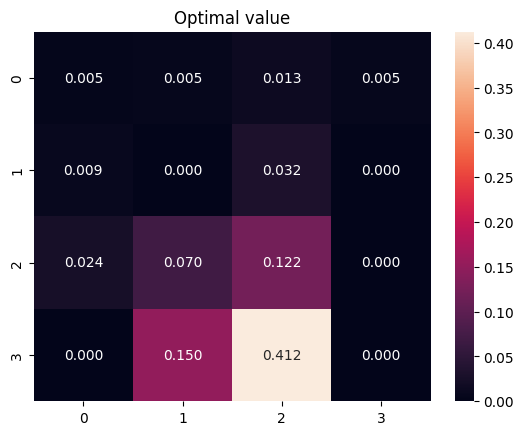

In [20]:
df = pd.DataFrame(V.round(4).reshape(4, 4))
print("Optimal Value : \n", df)

sns.heatmap(df, annot=True, fmt = ".3f")
plt.title("Optimal value")
plt.show()

In [12]:
print(num_states)
print(num_actions)
display(transitions)

16
4


{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(